# Importar librerías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sb
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("ICFES.csv", delimiter=",")

# 1. Características de calidad de los datos

In [3]:
# Se crea una función que realiza una exploración general a la base de datos
def descripcion(df):
  print("------------------ Descripción general de los datos ------------------")
  print("")
  print("En total la base de datos tiene " + str(len(df)) + " registros y " + str(df.shape[1])+ " variables.")
  print("")
  print("Los periodos evaluados son: " + str(df['PERIODO'].unique()))
  print("")
  print("Hay " + str(len(df.select_dtypes(include=['int', 'float']).columns)) + " variables numéricas, las cuales son: " + str(list(df.select_dtypes(include=['int', 'float']).columns)))
  print("")
  print("Hay " + str(len(df.select_dtypes(include=['object']).columns))+ " variables categóricas, las cuales son:" + str(list(df.select_dtypes(include=['object']).columns)))
  print("")
  print("Algunas columnas tienen valores faltantes, a continuación se puede el porcentaje de valores nulos por columna:" +str(df.isnull().sum()/len(df)))
descripcion(df)

------------------ Descripción general de los datos ------------------

En total la base de datos tiene 7109704 registros y 8 variables.

Los periodos evaluados son: [20131 20194 20122 20132 20162 20172 20102 20142 20111 20112 20152 20121
 20171 20151 20101 20201 20161 20191 20224 20221 20211 20181 20141]

Hay 2 variables numéricas, las cuales son: ['PERIODO', 'ESTU_COD_RESIDE_MCPIO']

Hay 6 variables categóricas, las cuales son:['ESTU_CONSECUTIVO', 'ESTU_GENERO', 'ESTU_MCPIO_RESIDE', 'ESTU_PAIS_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']

Algunas columnas tienen valores faltantes, a continuación se puede el porcentaje de valores nulos por columna:PERIODO                  0.000000
ESTU_CONSECUTIVO         0.000000
ESTU_COD_RESIDE_MCPIO    0.005569
ESTU_GENERO              0.000479
ESTU_MCPIO_RESIDE        0.005569
ESTU_PAIS_RESIDE         0.000000
FAMI_ESTRATOVIVIENDA     0.030693
FAMI_TIENEINTERNET       0.026952
dtype: float64


In [4]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(df[df.isnull().sum(axis=1) >= i])/len(df),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 3.51, 2: 2.69, 3: 0.44, 4: 0.28, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [5]:
# Revisar consistencia
for column in df.columns:
    print(f"Valores únicos en '{column}': {df[column].unique()}")

Valores únicos en 'PERIODO': [20131 20194 20122 20132 20162 20172 20102 20142 20111 20112 20152 20121
 20171 20151 20101 20201 20161 20191 20224 20221 20211 20181 20141]
Valores únicos en 'ESTU_CONSECUTIVO': ['SB11201310000414' 'SB11201940464873' 'SB11201220204399' ...
 'AC202210006814' 'AC202210029659' 'AC202210031563']
Valores únicos en 'ESTU_COD_RESIDE_MCPIO': [11001. 41016. 63130. ... 94885. 91530. 94886.]
Valores únicos en 'ESTU_GENERO': ['F' 'M' nan]
Valores únicos en 'ESTU_MCPIO_RESIDE': ['BOGOTÁ D.C.' 'AIPE' 'CALARCÁ' ... 'LA GUADALUPE' 'PUERTO ALEGRÍA'
 'CACAHUAL']
Valores únicos en 'ESTU_PAIS_RESIDE': ['COLOMBIA' 'ESTADOS UNIDOS' 'VENEZUELA' 'ARGELIA' 'ECUADOR' 'ESPAÑA'
 'COREA DEL SUR' 'PANAMÁ' 'BRASIL' 'COMORAS' 'PERÚ' 'REINO UNIDO' 'MÉXICO'
 'BOLIVIA' 'DINAMARCA' 'BELICE' 'ANGOLA' 'TAIWAN' 'ITALIA' 'AUSTRIA'
 'ARGENTINA' 'CHILE' 'COREA DEL NORTE' 'TERRITORIOS PALESTINOS' 'JAPÓN'
 'GUATEMALA' 'ALEMANIA' 'COSTA RICA' 'COSTA DE MARFIL' 'ALAND'
 'REPÚBLICA DOMINICANA' 'CHAD' '

In [6]:
# Revisar claridad
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109704 entries, 0 to 7109703
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 433.9+ MB


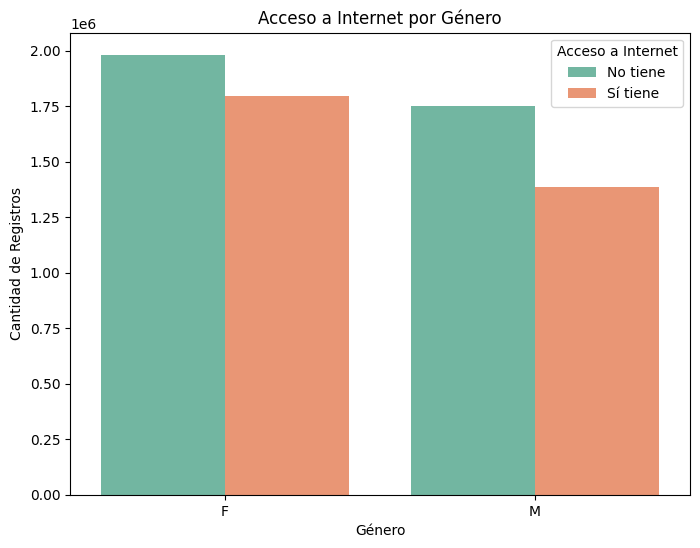

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='ESTU_GENERO', hue='FAMI_TIENEINTERNET', palette='Set2')

# Personalización del gráfico
plt.title('Acceso a Internet por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Registros')
plt.legend(title='Acceso a Internet', labels=['No tiene', 'Sí tiene'])

# Mostrar el gráfico
plt.show()

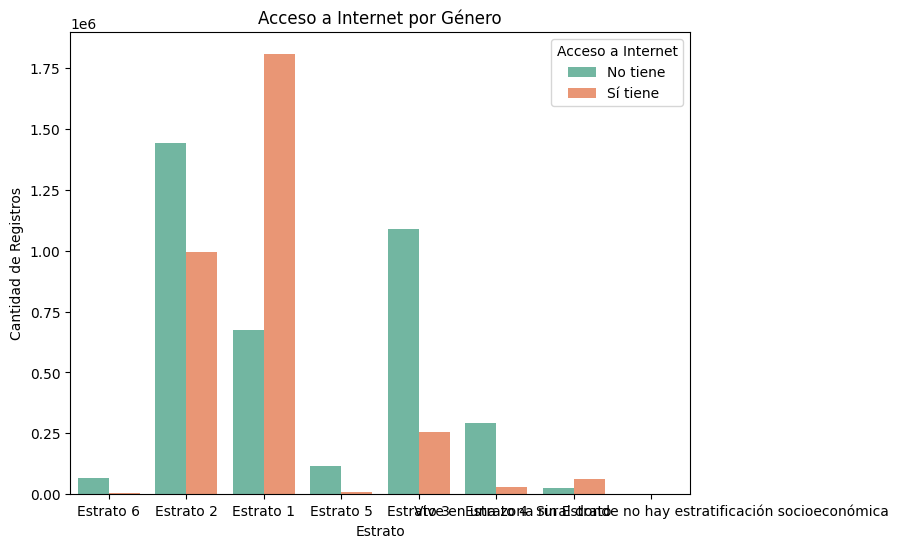

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='FAMI_ESTRATOVIVIENDA', hue='FAMI_TIENEINTERNET', palette='Set2')

# Personalización del gráfico
plt.title('Acceso a Internet por Género')
plt.xlabel('Estrato')
plt.ylabel('Cantidad de Registros')
plt.legend(title='Acceso a Internet', labels=['No tiene', 'Sí tiene'])

# Mostrar el gráfico
plt.show()

In [9]:
df[df['FAMI_ESTRATOVIVIENDA']=='Estrato 5']

,PERIODO,ESTU_CONSECUTIVO,ESTU_COD_RESIDE_MCPIO,ESTU_GENERO,ESTU_MCPIO_RESIDE,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
7,20162,SB11201620084846,76001.0,M,CALI,COLOMBIA,Estrato 5,Si
230,20162,SB11201620001173,25473.0,M,MOSQUERA,COLOMBIA,Estrato 5,Si
236,20194,SB11201940585366,50270.0,F,EL DORADO,COLOMBIA,Estrato 5,No
237,20194,SB11201940585366,50270.0,F,EL DORADO,COLOMBIA,Estrato 5,No
253,20112,SB11201120008599,68001.0,M,BUCARAMANGA,COLOMBIA,Estrato 5,Si
...,...,...,...,...,...,...,...,...
7109671,20221,AC202210003941,76001.0,F,CALI,COLOMBIA,Estrato 5,Si
7109674,20221,AC202210003591,11001.0,F,BOGOTÁ D.C.,BÉLGICA,Estrato 5,Si
7109681,20221,AC202210010369,76001.0,F,CALI,COLOMBIA,Estrato 5,Si
7109686,20221,AC202210019245,11001.0,F,BOGOTÁ D.C.,COLOMBIA,Estrato 5,Si


In [10]:
# Crear una tabla de contingencia entre municipio de residencia y acceso a internet
contingency_table = pd.crosstab(df['ESTU_MCPIO_RESIDE'], df['FAMI_TIENEINTERNET'])

# Ver la tabla
print(contingency_table)

FAMI_TIENEINTERNET    No    Si
ESTU_MCPIO_RESIDE             
ABEJORRAL           1449   790
ABRIAQUÍ             267    56
ACACÍAS             5961  6456
ACANDÍ               679   282
ACEVEDO             2565   994
...                  ...   ...
ZONA BANANERA       7055  1726
ÁBREGO              1937   605
ÍQUIRA              1260   255
ÚMBITA              1101   236
ÚTICA                506   156

[1037 rows x 2 columns]


# 2. Técnicas de limpieza de datos

In [11]:
# Eliminar registros de estudiantes que residen por fuera de Colombia
df = df[df['ESTU_PAIS_RESIDE'] == 'COLOMBIA']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7090937 entries, 0 to 7109703
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 486.9+ MB


In [12]:
# Eliminar periodos anteriores a 2012
periodos_a_eliminar = [20102, 20111, 20112, 20101]
df = df[~df['PERIODO'].isin(periodos_a_eliminar)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5770516 entries, 0 to 7109703
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 396.2+ MB


In [13]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(df[df.isnull().sum(axis=1) >= i])/len(df),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 3.55, 2: 2.8, 3: 0.15, 4: 0.08, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [14]:
# Eliminar registros con más de 2 columnas vacías
df = df[df.isnull().sum(axis=1) <= 2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5761817 entries, 0 to 7109703
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 395.6+ MB


In [15]:
# Eliminar registros con exactamente 2 columnas faltantes
df = df[df.isnull().sum(axis=1) != 2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5609223 entries, 0 to 7109703
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 385.2+ MB


In [16]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(df[df.isnull().sum(axis=1) >= i])/len(df),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 0.78, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [17]:
descripcion(df)

------------------ Descripción general de los datos ------------------

En total la base de datos tiene 5609223 registros y 8 variables.

Los periodos evaluados son: [20131 20194 20122 20132 20162 20172 20142 20152 20121 20171 20151 20201
 20161 20191 20224 20221 20211 20181 20141]

Hay 2 variables numéricas, las cuales son: ['PERIODO', 'ESTU_COD_RESIDE_MCPIO']

Hay 6 variables categóricas, las cuales son:['ESTU_CONSECUTIVO', 'ESTU_GENERO', 'ESTU_MCPIO_RESIDE', 'ESTU_PAIS_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']

Algunas columnas tienen valores faltantes, a continuación se puede el porcentaje de valores nulos por columna:PERIODO                  0.000000
ESTU_CONSECUTIVO         0.000000
ESTU_COD_RESIDE_MCPIO    0.000000
ESTU_GENERO              0.000488
ESTU_MCPIO_RESIDE        0.000000
ESTU_PAIS_RESIDE         0.000000
FAMI_ESTRATOVIVIENDA     0.005374
FAMI_TIENEINTERNET       0.001953
dtype: float64


In [18]:
# Mostrar registros con al menos un campo faltante
registros_con_faltantes = df[df.isnull().any(axis=1)]

registros_con_faltantes

,PERIODO,ESTU_CONSECUTIVO,ESTU_COD_RESIDE_MCPIO,ESTU_GENERO,ESTU_MCPIO_RESIDE,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
300,20194,SB11201940581723,73001.0,F,IBAGUÉ,COLOMBIA,NaN,No
301,20194,SB11201940581723,73001.0,F,IBAGUÉ,COLOMBIA,NaN,No
790,20171,SB11201710029895,76001.0,M,CALI,COLOMBIA,Estrato 3,NaN
855,20172,SB11201720314011,13657.0,M,SAN JUAN NEPOMUCENO,COLOMBIA,NaN,No
1853,20172,SB11201720480960,25086.0,F,BELTRÁN,COLOMBIA,Estrato 2,NaN
...,...,...,...,...,...,...,...,...
7108970,20221,AC202210024827,11001.0,F,BOGOTÁ D.C.,COLOMBIA,Estrato 2,NaN
7109038,20221,AC202210020821,13001.0,F,CARTAGENA DE INDIAS,COLOMBIA,NaN,Si
7109073,20221,AC202210008288,76001.0,M,CALI,COLOMBIA,NaN,Si
7109318,20221,AC202210004050,76520.0,M,PALMIRA,COLOMBIA,NaN,Si


In [19]:
# Imputación de la variable 'ESTU_GENERO' con la moda
# Calcular la moda de la columna 'ESTU_GENERO'
moda_genero = df['ESTU_GENERO'].mode()[0]

# Reemplazar los valores faltantes con la moda
df['ESTU_GENERO'].fillna(moda_genero, inplace=True)

# Verificar si la imputación fue exitosa
print(df['ESTU_GENERO'].isnull().sum())

<ipython-input-19-e2abfb9d6581>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ESTU_GENERO'].fillna(moda_genero, inplace=True)


0


In [20]:
# Imputar 'FAMI_ESTRATOVIVIENDA' y 'FAMI_TIENEINTERNET' por la moda dentro de cada grupo de 'ESTU_COD_RESIDE_MCPIO'
for columna in ['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']:
    # Imputación por la moda dentro de cada grupo
    df[columna] = df.groupby('ESTU_COD_RESIDE_MCPIO')[columna].transform(lambda x: x.fillna(x.mode()[0]))

# Verificación
print(df[['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']].isnull().sum())

FAMI_ESTRATOVIVIENDA    0
FAMI_TIENEINTERNET      0
dtype: int64


In [21]:
# Revisar consistencia
for column in df.columns:
    print(f"Valores únicos en '{column}': {df[column].unique()}")

Valores únicos en 'PERIODO': [20131 20194 20122 20132 20162 20172 20142 20152 20121 20171 20151 20201
 20161 20191 20224 20221 20211 20181 20141]
Valores únicos en 'ESTU_CONSECUTIVO': ['SB11201310000414' 'SB11201940464873' 'SB11201220204399' ...
 'AC202210006814' 'AC202210029659' 'AC202210031563']
Valores únicos en 'ESTU_COD_RESIDE_MCPIO': [11001. 41016. 63130. ... 91669. 91530. 94885.]
Valores únicos en 'ESTU_GENERO': ['F' 'M']
Valores únicos en 'ESTU_MCPIO_RESIDE': ['BOGOTÁ D.C.' 'AIPE' 'CALARCÁ' ... 'MORICHAL' 'PUERTO ALEGRÍA'
 'LA GUADALUPE']
Valores únicos en 'ESTU_PAIS_RESIDE': ['COLOMBIA']
Valores únicos en 'FAMI_ESTRATOVIVIENDA': ['Estrato 6' 'Estrato 2' 'Estrato 1' 'Estrato 5' 'Estrato 3' 'Estrato 4'
 'Sin Estrato']
Valores únicos en 'FAMI_TIENEINTERNET': ['Si' 'No']


In [23]:
# Eliminar ESTU_PAIS_RESIDE
df = df.drop('ESTU_PAIS_RESIDE', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5609223 entries, 0 to 7109703
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   FAMI_ESTRATOVIVIENDA   object 
 6   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 342.4+ MB


# Técnicas para entendimiento de datos

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5609223 entries, 0 to 7109703
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 385.2+ MB


In [24]:
# Crear la variable 'Año' a partir de la columna 'PERIODO'
df['Año'] = df['PERIODO'].astype(str).str[:4].astype(int)
df

,PERIODO,ESTU_CONSECUTIVO,ESTU_COD_RESIDE_MCPIO,ESTU_GENERO,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,Año
0,20131,SB11201310000414,11001.0,F,BOGOTÁ D.C.,Estrato 6,Si,2013
1,20194,SB11201940464873,41016.0,F,AIPE,Estrato 2,Si,2019
2,20194,SB11201940464873,41016.0,F,AIPE,Estrato 2,Si,2019
3,20122,SB11201220204399,63130.0,F,CALARCÁ,Estrato 1,Si,2012
4,20132,SB11201320464198,19001.0,F,POPAYÁN,Estrato 2,Si,2013
...,...,...,...,...,...,...,...,...
7109699,20221,AC202210003698,11001.0,M,BOGOTÁ D.C.,Estrato 6,Si,2022
7109700,20221,AC202210034448,11001.0,F,BOGOTÁ D.C.,Estrato 1,Si,2022
7109701,20221,AC202210006814,11001.0,F,BOGOTÁ D.C.,Estrato 6,Si,2022
7109702,20221,AC202210029659,11001.0,M,BOGOTÁ D.C.,Estrato 2,Si,2022


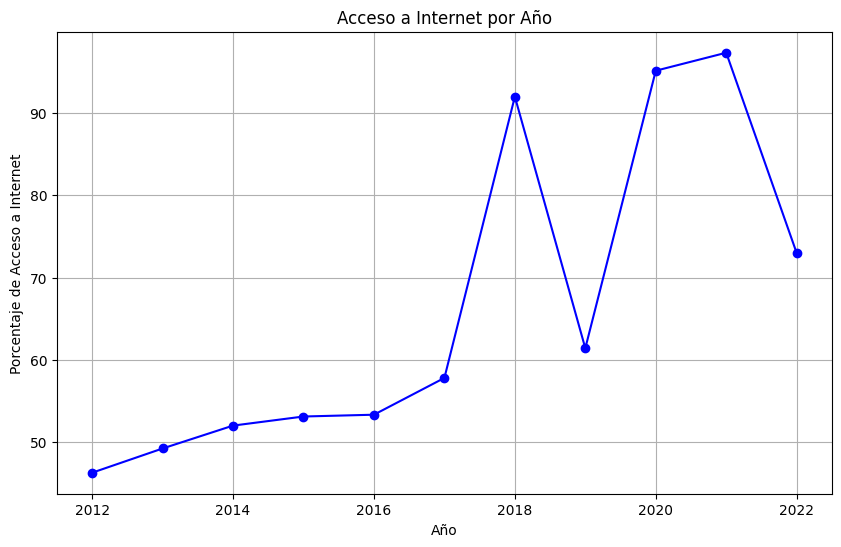

In [26]:
# Calcular el acceso a internet por año
internet_access_year = df.groupby('Año')['FAMI_TIENEINTERNET'].apply(lambda x: (x == 'Si').sum() / x.count() * 100)

# Gráfico de acceso a internet por año
plt.figure(figsize=(10, 6))
plt.plot(internet_access_year.index, internet_access_year.values, marker='o', linestyle='-', color='b')
plt.title('Acceso a Internet por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Acceso a Internet')
plt.grid(True)
plt.show()

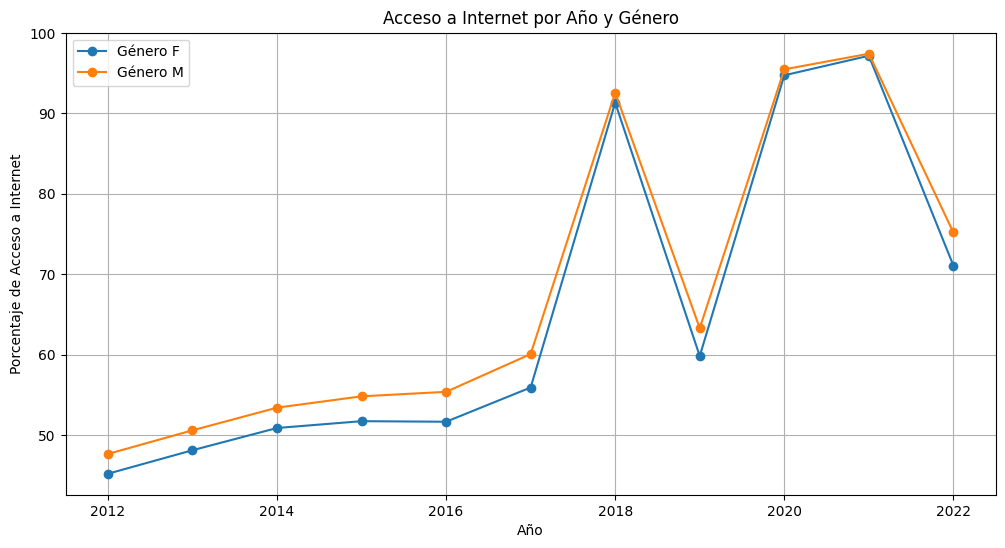

In [27]:
# Calcular el acceso a internet por año y género
internet_access_gender_year = df.groupby(['Año', 'ESTU_GENERO'])['FAMI_TIENEINTERNET'].apply(lambda x: (x == 'Si').sum() / x.count() * 100).unstack()

# Gráfico de acceso a internet por año y género
plt.figure(figsize=(12, 6))
for gender in ['F', 'M']:
    plt.plot(internet_access_gender_year.index, internet_access_gender_year[gender], marker='o', label=f'Género {gender}')
plt.title('Acceso a Internet por Año y Género')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Acceso a Internet')
plt.legend()
plt.grid(True)
plt.show()


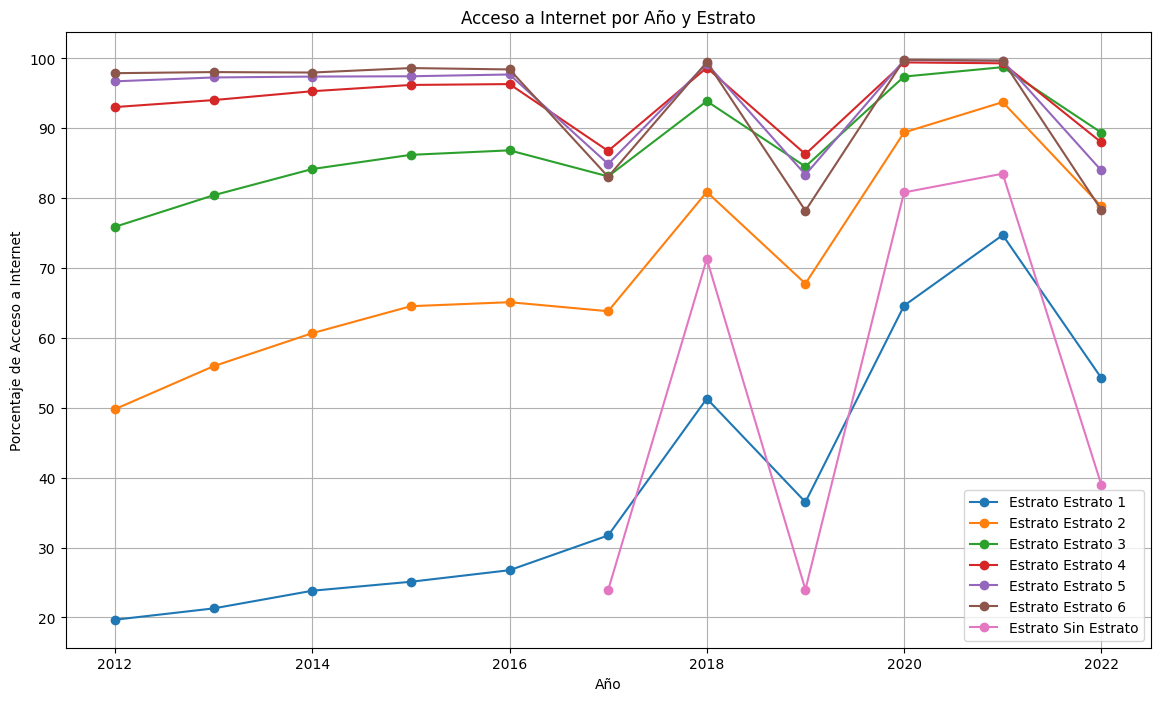

In [29]:
# Calcular el acceso a internet por año y estrato
internet_access_stratum_year = df.groupby(['Año', 'FAMI_ESTRATOVIVIENDA'])['FAMI_TIENEINTERNET'].apply(lambda x: (x == 'Si').sum() / x.count() * 100).unstack()

# Gráfico de acceso a internet por año y estrato
plt.figure(figsize=(14, 8))
for stratum in internet_access_stratum_year.columns:
    plt.plot(internet_access_stratum_year.index, internet_access_stratum_year[stratum], marker='o', label=f'Estrato {stratum}')
plt.title('Acceso a Internet por Año y Estrato')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Acceso a Internet')
plt.legend()
plt.grid(True)
plt.show()

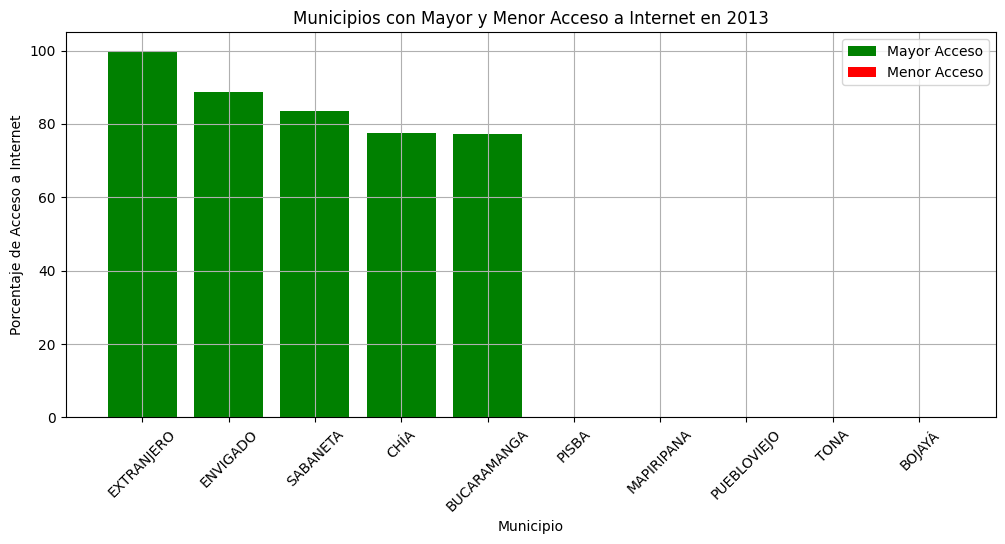

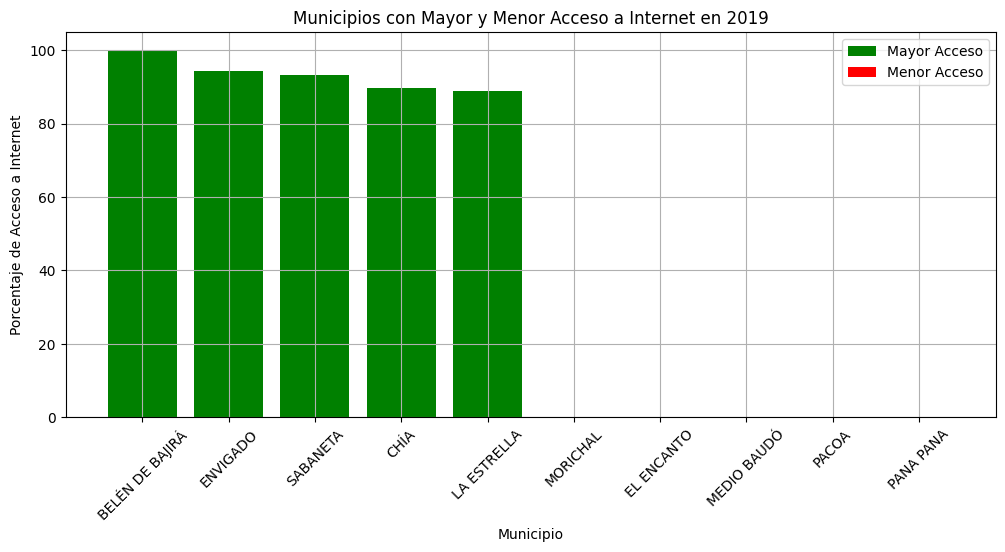

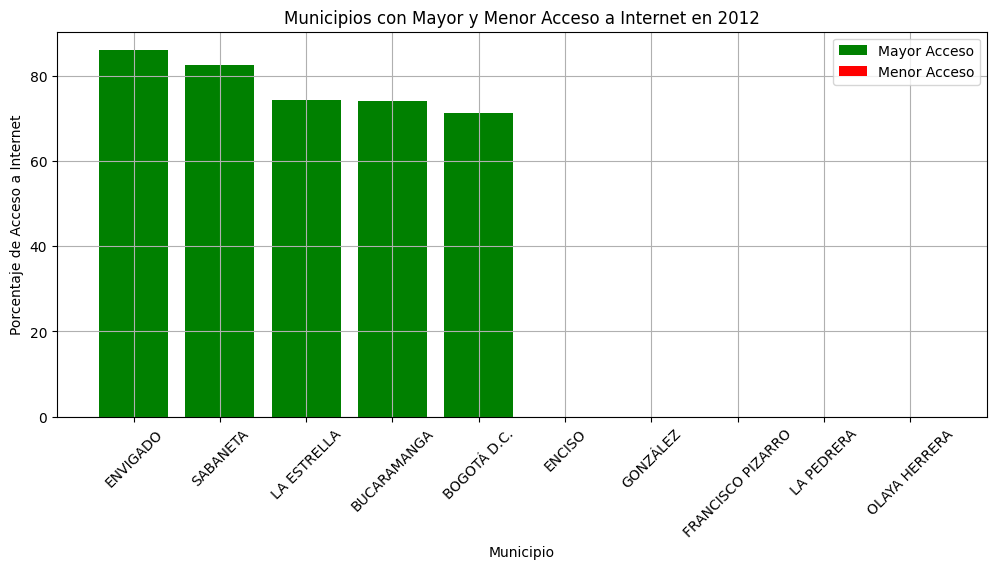

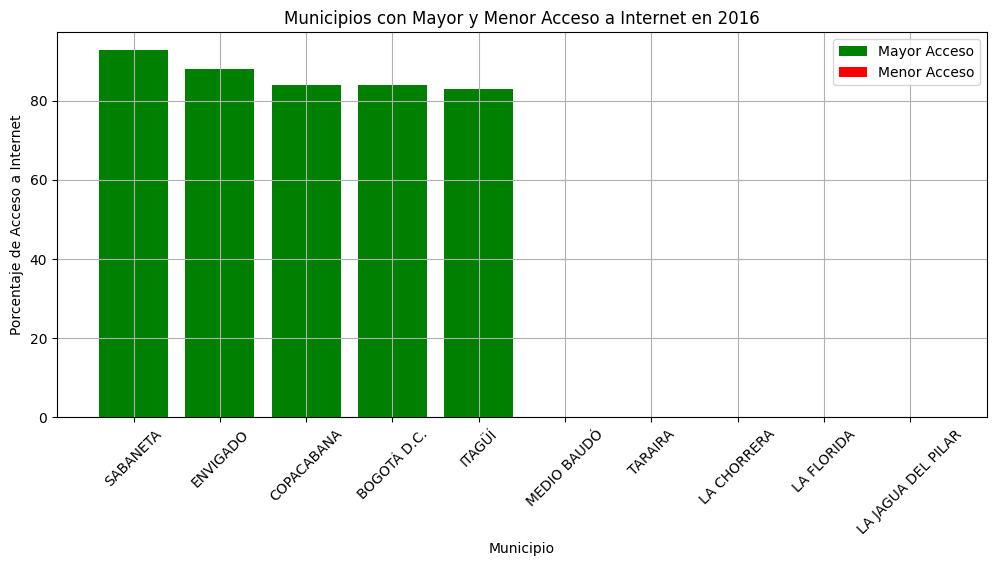

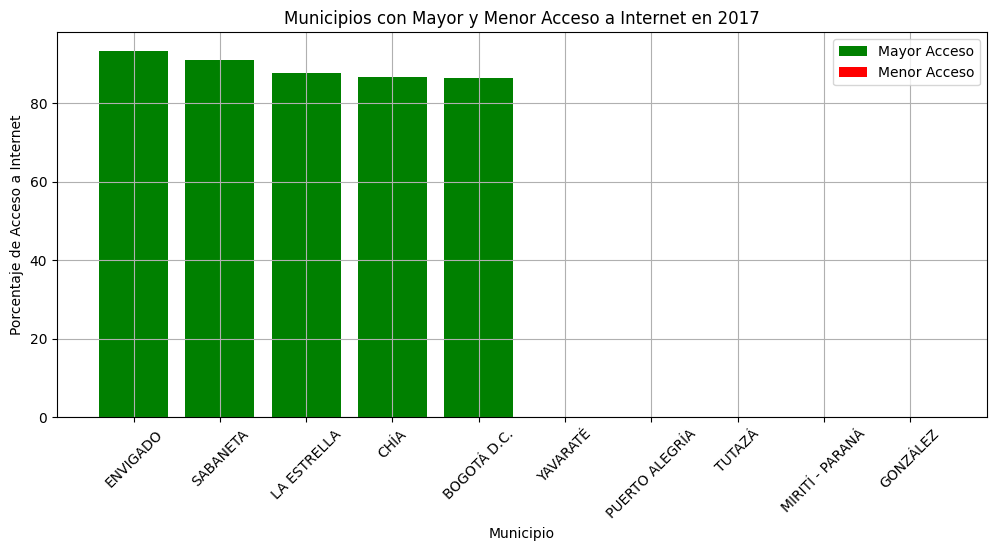

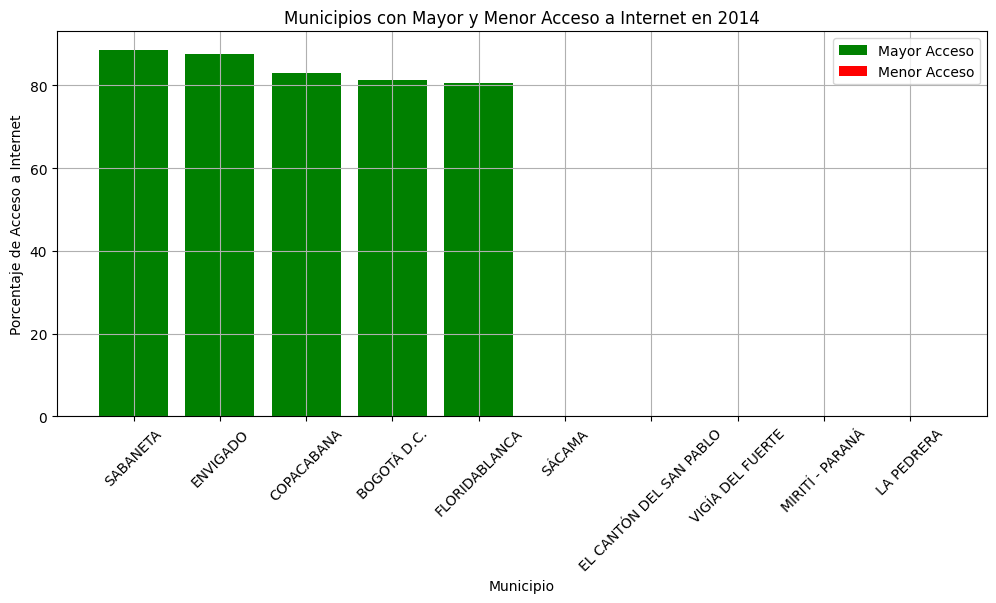

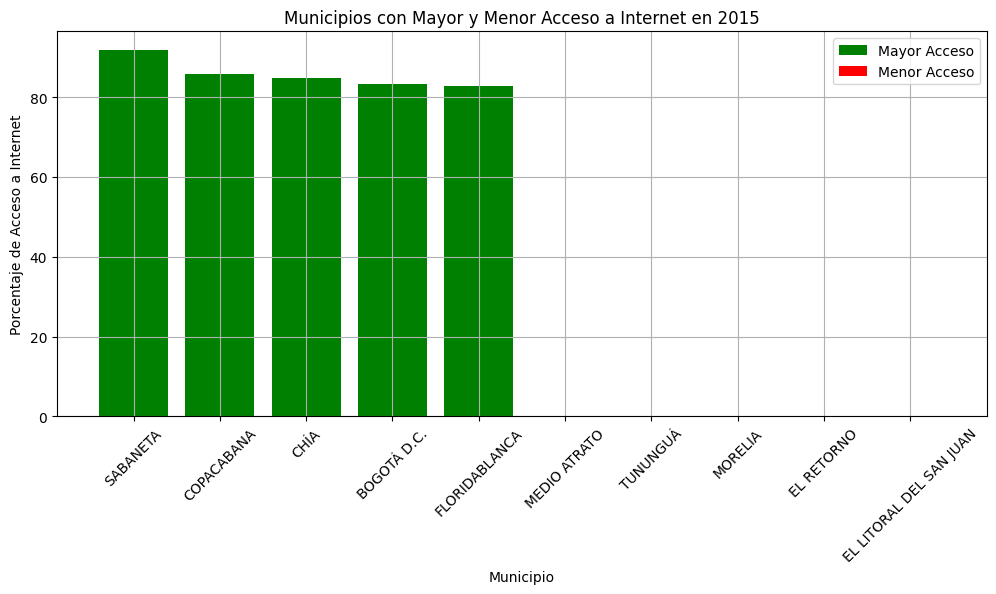

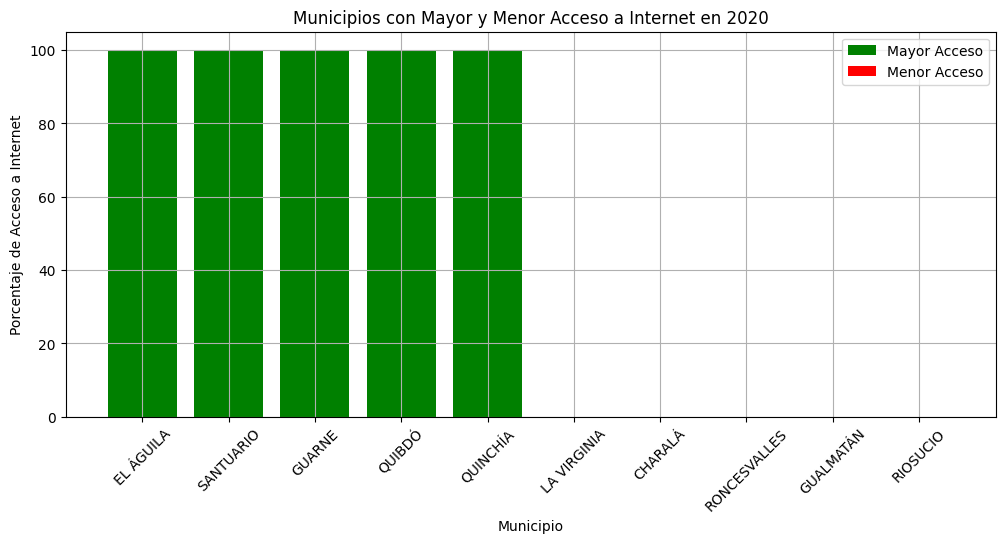

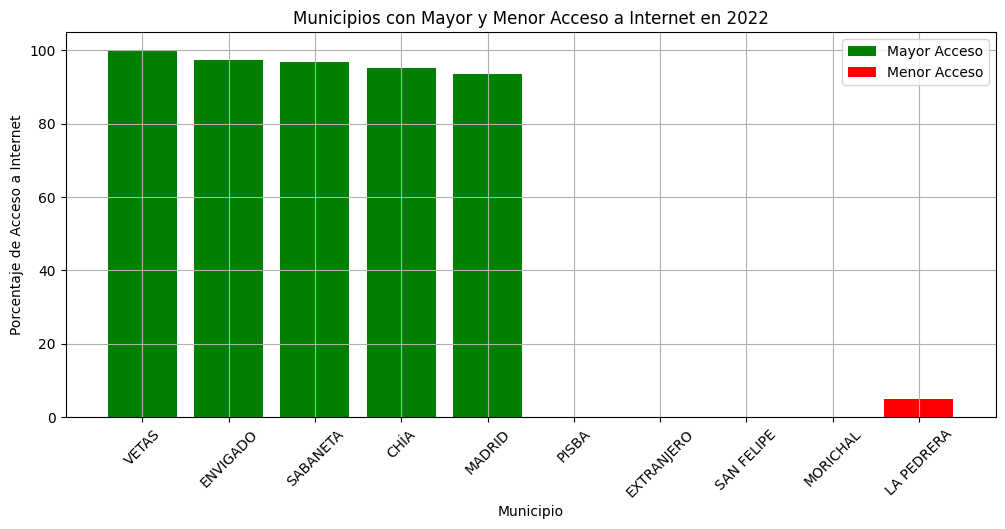

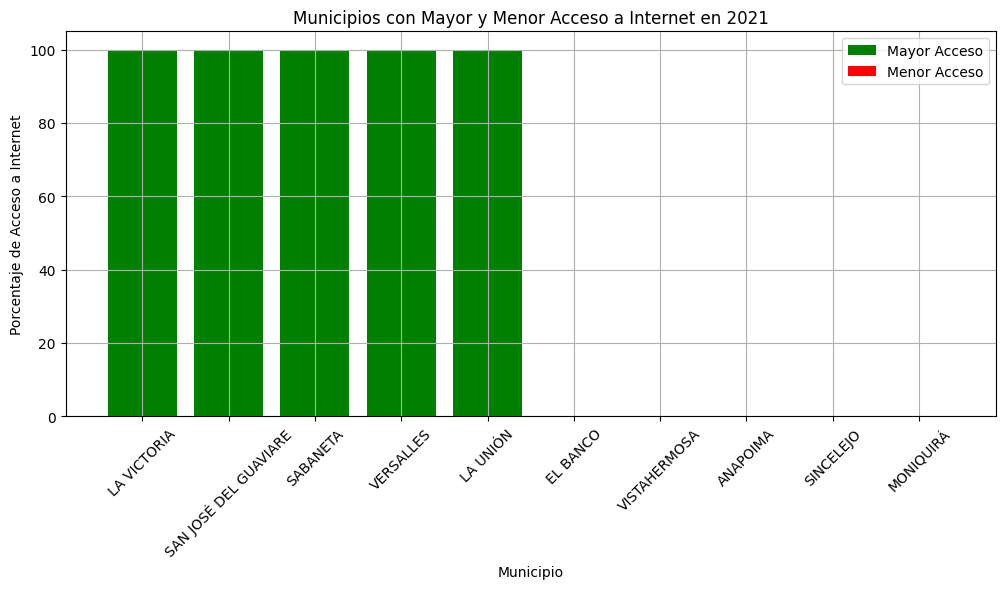

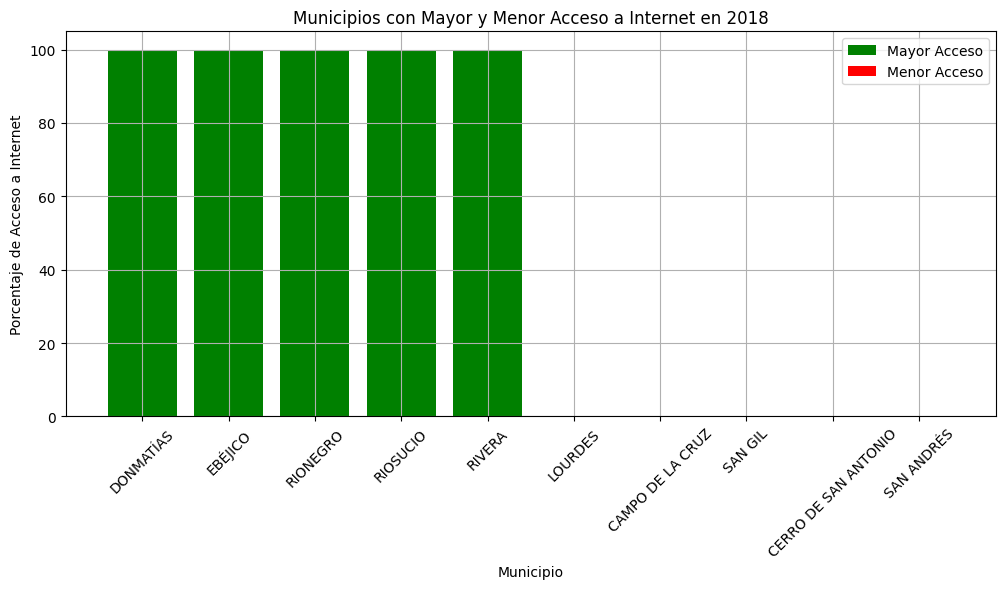

In [31]:
# Calcular los 5 municipios con mayor y menor acceso a internet por año
municipal_access = df.groupby(['Año', 'ESTU_MCPIO_RESIDE'])['FAMI_TIENEINTERNET'].apply(lambda x: (x == 'Si').sum() / x.count() * 100).reset_index()

for year in df['Año'].unique():
    top_5_municipios = municipal_access[municipal_access['Año'] == year].sort_values(by='FAMI_TIENEINTERNET', ascending=False).head(5)
    bottom_5_municipios = municipal_access[municipal_access['Año'] == year].sort_values(by='FAMI_TIENEINTERNET', ascending=True).head(5)

    # Gráfico de barras para los municipios
    plt.figure(figsize=(12, 5))
    plt.bar(top_5_municipios['ESTU_MCPIO_RESIDE'], top_5_municipios['FAMI_TIENEINTERNET'], color='green', label='Mayor Acceso')
    plt.bar(bottom_5_municipios['ESTU_MCPIO_RESIDE'], bottom_5_municipios['FAMI_TIENEINTERNET'], color='red', label='Menor Acceso')
    plt.title(f'Municipios con Mayor y Menor Acceso a Internet en {year}')
    plt.xlabel('Municipio')
    plt.ylabel('Porcentaje de Acceso a Internet')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()